## Neural Networks
## Hopfield Networks and  Restricted  Boltzmann Machines 


In [11]:
# We start by importing the python libraries required to solve the problems

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy as sp
import pandas as pd

# From sklearn we will use the implementations of the Multi-layer perceptron, and the Boltzmann Machines
from sklearn import cluster
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import binarize
from sklearn.neural_network import BernoulliRBM
#from sklearn.datasets.mldata import fetch_mldata
from sklearn.datasets import fetch_openml
from tensorflow.keras.datasets import mnist, fashion_mnist

# We will also use different metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics


# We will also discuss about on the neupy implementation of RBM and the Somoclu 
# implementation of Self-Organizing-Maps
from neupy import algorithms
import somoclu


from IPython.display import display
from IPython.display import Image

##  Hopfield Network 

The first class of networks we investigate is the Hopfield network, this is one example of the autoassociative networks algorithms.
The goal of a Hopfield network is to learn a memory or condensed representation of the input data. 
During the training phase it receives the a set of input data and it updates a weight-matrix representation of this information
using Hebbian learning.
During the prediction phase, the (possible corrupted or distorted input) is entered to the network and from this input it should be able
to recover the closest original input. In this sense the network work as a "memory".


In this first part we will show how to train the network and use for prediction. After seeing the examples students will have to solve different exercises.

In [8]:
# Function to display a letter from an array of 64 binary numbers
def ShowPattern(z):  
   rz = z.reshape(8,8)
   plt.imshow(rz)
   #plt.gray()
   plt.show()

In [9]:
 # We define the binary arrays corresponding to four letters that we will used in the experiments
    # These letters are: C,T,I, and O
    
C_letter = np.matrix([
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 0, 0, 0, 0, 0, 0,  
     1, 1, 0, 0, 0, 0, 0, 0,  
     1, 1, 0, 0, 0, 0, 0, 0,  
     1, 1, 0, 0, 0, 0, 0, 0,     
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1     
    ])     
    
    
T_letter = np.matrix([
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0          
   ])    
        
     
I_letter = np.matrix([
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1
    ])    
    
        
O_letter = np.matrix([
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 0, 0, 0, 0, 1, 1,  
     1, 1, 0, 0, 0, 0, 1, 1,  
     1, 1, 0, 0, 0, 0, 1, 1,  
     1, 1, 0, 0, 0, 0, 1, 1,     
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1     
    ])     
    

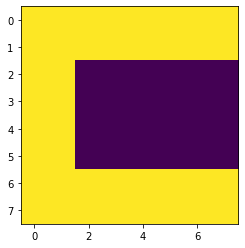

In [12]:
# As an example we display letter C
ShowPattern(C_letter)


In [13]:
# The dataset is created concatenating the representation of letters C, T, and I
data = np.concatenate([C_letter,T_letter,I_letter], axis=0)

# The discrete network is learned 
# mode='sync' refers to the synchronous mode which is used for pattern recovery (not for learning)
# More details here: http://neupy.com/modules/generated/neupy.algorithms.DiscreteHopfieldNetwork.html#neupy.algorithms.DiscreteHopfieldNetwork
dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync')

# The network is trained using the data
dhnet.train(data)



In [14]:
# We print the details of the network to see its parameters
print(dhnet)

DiscreteHopfieldNetwork(verbose=False, mode=sync, n_times=100, check_limit=True)


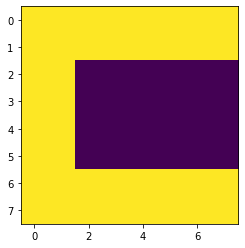

In [15]:
# The prediction of the network for letter O is computed
result = dhnet.predict(O_letter)

# We print the prediction
ShowPattern(result)



## Exercise 1

Analyze the prediction given by the previous network. Does it predict letter O?  Why?


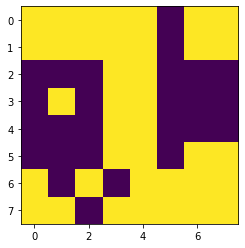

In [16]:
# Now we create a distorted version of letter I and show this figure

distorted_I_letter_1 = np.matrix([
     1, 1, 1, 1, 1, 0, 1, 1,
     1, 1, 1, 1, 1, 0, 1, 1,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 1, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 1, 1,
     1, 0, 1, 0, 1, 1, 1, 1,
     1, 1, 0, 1, 1, 1, 1, 1
    ])    
    
    
ShowPattern(distorted_I_letter_1)

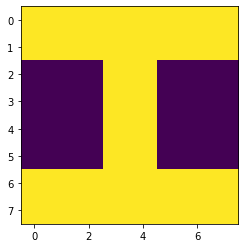

In [17]:
# We compute the result of the network for this distorted version of letter I
result_distorted_I_letter_1= dhnet.predict(distorted_I_letter_1)

# The prediction is shown.
ShowPattern(result_distorted_I_letter_1)

## Exercise 2

Analyze the prediction given by the previous network. Does it predict letter I?  Why?


We repeat the previous process, this time for letter C

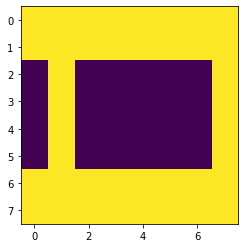

In [23]:
distorted_C_letter_1 = np.matrix([
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1,
     0, 1, 0, 0, 0, 0, 0, 1,  
     0, 1, 0, 0, 0, 0, 0, 1,  
     0, 1, 0, 0, 0, 0, 0, 1,  
     0, 1, 0, 0, 0, 0, 0, 1,     
     1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1     
    ])     
    
ShowPattern(distorted_C_letter_1)

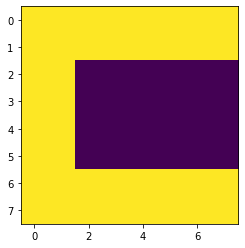

In [22]:
# We compute the result of the network for this distorted version of letter C
result_distorted_C_letter_1= dhnet.predict(distorted_C_letter_1)

# The prediction is shown.
ShowPattern(result_distorted_C_letter_1)

## Exercise 3

Analyze the prediction given by the previous network. Does it predict letter C?  Why?

Now, we create a random input pattern

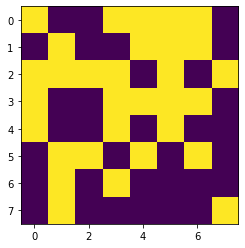

In [20]:
random_pattern = np.random.randint(0,2,[1,64])

# The pattern is shown
ShowPattern(random_pattern)

The prediction of the network is computed for the random pattern

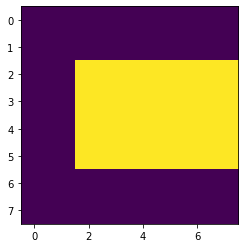

In [21]:
result_random_pattern = dhnet.predict(random_pattern)

# The prediction is display
ShowPattern(result_random_pattern)

## Exercise 4

Analyze the prediction given by the previous network. Which letter does it predict?  Why?

## Restricted Boltzmann Machines (RBM)

Run the following cell to produce an image of the an RBM architecture.

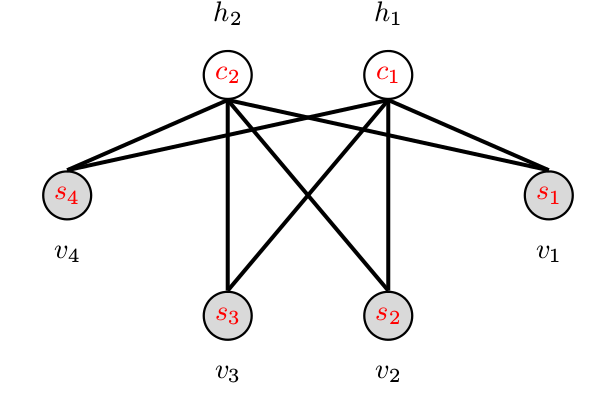

In [24]:
i = Image(filename='images/RBM_Example.png')
i

This RBM has 6 nodes. Four visible units (shown in gray) that receive the inputs and two hidden units (shown in white). Each visible unit is connected to all hidden units, and each hidden unit is connected to all visible units. 
Remind that RBMs are used for unsupervised machine learning problems. No information about the class is used to learn an RBM. 

The RBM is one of the most important neural networks with a set of relevant characteristics:
    
1) It has an energy model and connects with pioneering work on the Hopfield Network.

2) It is also a probabilistic graphical model that represents and exploits conditional probabilistic relationships between the variables.

3) It contains a set of latent variables that can represent higher order patterns present in the data.

4) It is the building block of a number of Deep Neural Networks. 

We define an sklearn object that represents an RBM with 100 hidden neurons. The number of visible units will depend on the data used to train the network.

In [25]:
sk_rbm = BernoulliRBM(n_components=100, verbose=True, learning_rate=0.1, n_iter=50)

To show the behavior of the RBM,  we will use the MNIST dataset. This is perhaps the dataset most employed to evaluate and extend Deep Neural Networks. 
The MNIST dataset is a database of handwritten digits. It contains images of 10 digits. Therefore it can be used as a model of a 10-class supervised classification problem. 

You could get more details about that dataset here: http://yann.lecun.com/exdb/mnist/


Run the following cell to read all the data (60000 instances).

In [26]:
(X_mnist, y_mnist), (x_test, y_test) = mnist.load_data()

X_mnist = np.reshape(X_mnist, (-1, 784))

X_mnist = X_mnist/255.

We show one example of the images included in the dataset. Notice that in our dataset, the images of 28x28 are transformed to vectors of 784 variables.

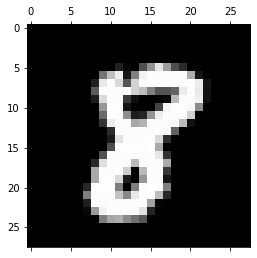

In [27]:
plt.matshow(X_mnist[16000].reshape(28,28), cmap=plt.cm.gray,)
plt.show()

To see the variability of training data for a single digit you can follow the following link: http://www.cs.nyu.edu/~roweis/data/mnist_train8.jpg

Before learning the RBM, we select a subset of the training data. A decimation_factor variable is used. This means that from each group of 'decimation_factor' vectors, we will take only one.

We also binarize the dataset since the RBM has binary visible and hidden units.

In [28]:
decimation_factor = 50
data_mnist = binarize(X_mnist[::decimation_factor])

As other ML algorithms, the learning method used by the RBM tries to learn a set of parameters (weights) that maximizes the quality of the model. Often, the quality of a model is computed by maximizing the probability it gives to the training instances using the log-likelihood, i.e., 
$\sum_i log(\hat{p}(x^i))$ where $\hat{p}(x)$ is the probability given by the network to an input vector.

However, in the case of the RBM, it is not possible to compute the log-likelihood due to the difficulty of computing the partition function. Therefore, instead of maximizing the likelihood, the pseudo-likelihood is used. The pseudo-likelihood is the sum of the log-probabilities of each visible unit  $x_i$, conditioned on the state of all other bits. 


Finally, the RBM is learned. Notice that the learning algorithm used by the RBM increases the value of the pseudo-likelihood as it progresses

In [29]:
sk_rbm.fit(data_mnist)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -219.42, time = 3.09s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -213.01, time = 4.51s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -197.46, time = 2.87s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -180.50, time = 0.43s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -195.48, time = 0.31s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -150.54, time = 0.37s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -162.07, time = 0.30s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -139.88, time = 0.41s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -165.13, time = 0.57s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -122.93, time = 0.31s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -153.07, time = 0.31s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -145.28, time = 0.31s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -124.89, time = 0.33s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -122.35, time = 0.30s
[BernoulliRBM] 

BernoulliRBM(n_components=100, n_iter=50, verbose=True)

## Exercise 5


Calculate the number of parameters (weights) used by the sk_rbm network that we have just learned

In [34]:
784*100+784+100

79284

In [38]:
print(vars(sk_rbm))

{'n_components': 100, 'learning_rate': 0.1, 'batch_size': 10, 'n_iter': 50, 'verbose': True, 'random_state': None, 'n_features_in_': 784, 'components_': array([[-0.06026121, -0.05415936, -0.08942557, ..., -0.07865894,
        -0.07422708, -0.06944535],
       [-0.06567073, -0.09011039, -0.07195199, ..., -0.0854666 ,
        -0.07314876, -0.0681427 ],
       [-0.04509459, -0.07746587, -0.08385117, ..., -0.06845631,
        -0.06585086, -0.07711932],
       ...,
       [-0.05061531, -0.0990416 , -0.10066234, ..., -0.08510901,
        -0.07606027, -0.10017672],
       [-0.50010929, -0.48102115, -0.51950867, ..., -0.54779564,
        -0.46905381, -0.51585778],
       [-0.16623752, -0.18345214, -0.23661732, ..., -0.19890062,
        -0.20251901, -0.17896219]]), 'intercept_hidden_': array([0.61192329, 0.91752157, 0.51225393, 2.65230359, 3.80844013,
       1.27570017, 1.47734861, 2.93991536, 2.86920879, 1.90261523,
       4.35911365, 2.60730943, 1.41232388, 2.36377014, 6.05885914,
       1.11

In [46]:
print(sk_rbm.components_.shape)
print(sk_rbm.intercept_visible_.shape)
print(sk_rbm.h_samples_.shape)

(100, 784)
(784,)
(10, 100)


In [47]:
print(sk_rbm.n_features_in_)
print(sk_rbm.n_components)
print(sk_rbm.n_features_in_ * sk_rbm.n_components + sk_rbm.n_features_in_ + sk_rbm.n_components)

784
100
79284


## Analysis of the RBM latent variables

As mentioned before, the RMB we have learned has 100 latent variables. Now we show the weights learned by these neurons. Notice that since each hidden unit is connected to the 748 units, we can reshape the weights, for each of the hidden units as 28x28 matrices. These matrices are shown as images. There are 100 images, one for each weight vector. 


What is relevant is that the weights capture characteristic patterns of the data.


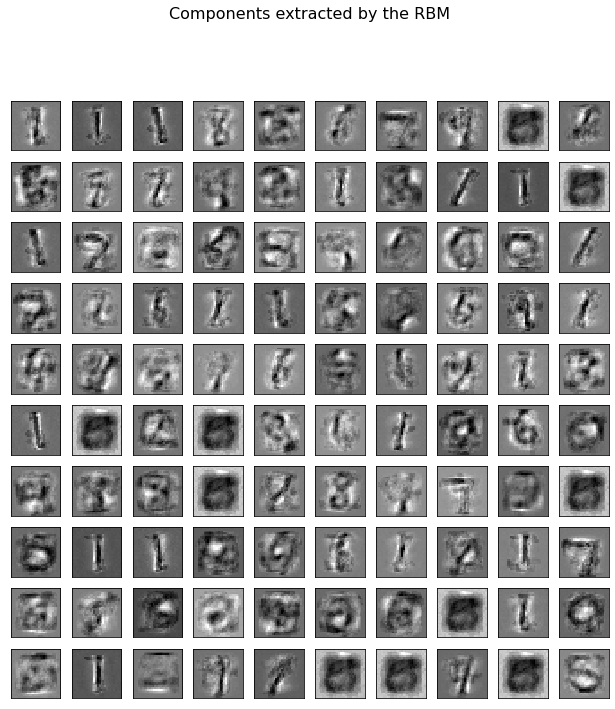

In [43]:
plt.figure(figsize=(10,10))
for i, comp in enumerate(sk_rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Components extracted by the RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

## Exercise 6

- Use the fashion-mnist dataset to learn an RBM with 25 hidden units. 
- Display the weights learned by the hidden neurons. 

 Run the following cell to read a subset of the fashion-mnist dataset and check the characteristics of the dataset here: https://github.com/zalandoresearch/fashion-mnist



In [91]:
(X_fashion, y_mnist), (x_test, y_test) = fashion_mnist.load_data()
y_mnist.shape

(60000,)

In [92]:
X_fashion = np.reshape(X_fashion, (-1, 784))

X_fashion = X_fashion_mnist/255.
X_fashion.shape

(60000, 784)

In [68]:
decimation_factor = 50
data_mnist = binarize(X_fashion[::decimation_factor])

In [69]:
sk_rbm = BernoulliRBM(n_components=25, verbose=True, learning_rate=0.1, n_iter=50)

In [70]:
sk_rbm.fit(data_mnist)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -388.30, time = 0.13s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -352.15, time = 0.21s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.96, time = 0.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -256.12, time = 0.30s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -269.36, time = 0.22s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -254.35, time = 0.30s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -243.91, time = 0.23s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -240.14, time = 0.19s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -257.03, time = 0.30s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -255.86, time = 0.19s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -251.66, time = 0.34s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -227.38, time = 0.19s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -259.93, time = 0.19s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -269.66, time = 0.20s
[BernoulliRBM] 

BernoulliRBM(n_components=25, n_iter=50, verbose=True)

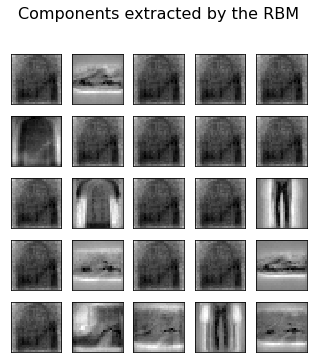

In [71]:
plt.figure(figsize=(5,5))
for i, comp in enumerate(sk_rbm.components_):
    plt.subplot(5, 5, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Components extracted by the RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

## Note
Given its importance the RBM model is implemented using other packages, e.g., Keras and neupy. The following lines show how to use the neupy functionality

In [72]:
rbm = algorithms.RBM(n_visible=28*28, n_hidden=10,verbose=True)
rbm.train(X_fashion, epochs=10)
hidden_states = rbm.visible_to_hidden(X_fashion)
hidden_states.round(2)
hidden_states.shape


Main information

[ALGORITHM] RBM

[OPTION] batch_size = 10
[OPTION] hidden_bias = Constant(0)
[OPTION] n_hidden = 10
[OPTION] n_visible = 784
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] verbose = True
[OPTION] visible_bias = Constant(0)
[OPTION] weight = Normal(mean=0, std=0.01)



Time: 0:00:00 |  1%|                             | ETA:  0:00:16 | loss: -0.798

#1 : [15 sec] train: -0.564004


Time: 0:00:00 |  1%|                             | ETA:  0:00:15 | loss: -0.843

#2 : [14 sec] train: -1.022370


Time: 0:00:00 |  1%|                             | ETA:  0:00:13 | loss:   -1.2

#3 : [13 sec] train: -0.868031


Time: 0:00:00 |  1%|                             | ETA:  0:00:13 | loss:  -1.08

#4 : [13 sec] train: -1.289228


Time: 0:00:00 |  0%|                             | ETA:  0:00:17 | loss: -0.587

#5 : [13 sec] train: -0.754961


Time: 0:00:00 |  1%|                             | ETA:  0:00:15 | loss: -0.548

#6 : [13 sec] train: -0.976818


Time: 0:00:00 |  1%|                             | ETA:  0:00:14 | loss: -0.977

#7 : [14 sec] train: -1.027027


Time: 0:00:00 |  1%|                             | ETA:  0:00:13 | loss:  -1.11

#8 : [14 sec] train: -0.862575


Time: 0:00:00 |  1%|                             | ETA:  0:00:13 | loss:  -0.62

#9 : [13 sec] train: -0.980026


#10 : [13 sec] train: -0.718590


(60000, 10)

In [73]:
hidden_states.shape

(60000, 10)

## Exercise 7

The latent variables produced by an RBM can be used as extracted features for learning a supervised classifer. For this purpose the sklearn library provides a function transform(): http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html


- Create a pipeline classifier for the fashion-mnist classification problem that first creates 60 features (corresponding to latent variables) of the RBM and then applies a 20-nuron, single-hidden-layer MLP 

- Estimate the accuracy of this pipeline using the test set.


*Remind that the RBM assumes binary units. 


In [110]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [111]:
(X_fashion, y_mnist), (x_test, y_test) = fashion_mnist.load_data()
y_mnist.shape

(60000,)

In [112]:
X_fashion = np.reshape(X_fashion, (-1, 784))

X_fashion = X_fashion_mnist/255.

In [113]:
decimation_factor = 50
data_mnist = binarize(X_fashion[::decimation_factor])

In [114]:
rbm = BernoulliRBM(n_components=60, verbose=True, learning_rate=0.1, n_iter=50)

In [115]:
clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(20,))

In [116]:
pipeline = Pipeline([("rbm", rbm), ("clf", clf)])

In [118]:
pipeline.fit(data_mnist, y_mnist[::decimation_factor])

[BernoulliRBM] Iteration 1, pseudo-likelihood = -314.94, time = 1.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -242.16, time = 1.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -286.19, time = 1.41s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -425.90, time = 0.94s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -272.39, time = 0.93s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -259.08, time = 1.39s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -361.79, time = 1.06s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -210.99, time = 1.15s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -344.96, time = 0.90s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -281.06, time = 0.71s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -227.07, time = 0.85s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -221.48, time = 0.78s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -219.36, time = 1.32s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -246.85, time = 0.94s
[BernoulliRBM] 

Pipeline(steps=[('rbm', BernoulliRBM(n_components=60, n_iter=50, verbose=True)),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000,
                               random_state=1))])

In [119]:
x_test = np.reshape(x_test, (-1, 784))

x_test = x_test/255.
x_test.shape

(10000, 784)

In [120]:
data_test = binarize(x_test[::decimation_factor])

In [122]:
prediction = pipeline.predict(data_test)

In [123]:
accuracy_score(prediction, y_test[::decimation_factor])

0.665